In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

from src import color_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 200

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = (mu_x_1,mu_variance_x_1,mu_y_1,mu_variance_y_1)
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = (mu_x_2,mu_variance_x_2,mu_y_2,mu_variance_y_2)
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = (mu_x_3,mu_variance_x_3,mu_y_3,mu_variance_y_3)

In [3]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)
Z_color, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme="PuBu")
Z_color_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,10,colorscheme="OrRd")
Z_color_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,10,colorscheme="RdPu")

(-0.5, 199.5, 199.5, -0.5)

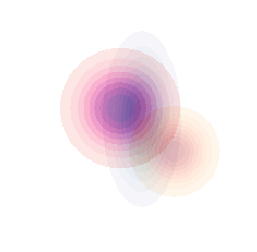

In [4]:
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, Z_color,Z_color_1,alpha=0.5)
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, mixed_rgb,Z_color_2,alpha=0.5)
plt.imshow(mixed_rgb)
plt.axis("off")

In [5]:
Z_color = color.rgb2hsv(Z_color)
Z_color_1 = color.rgb2hsv(Z_color_1)
Z_color_2 = color.rgb2hsv(Z_color_2)

In [6]:
def change_to_1(Z_color):
    for i in range(len(Z_color)):
        for j in range(len(Z_color[0])):
            Z_color[i][j][1] = 1.
            Z_color[i][j][2] = 1.
    return Z_color

In [7]:
Z_color = change_to_1(Z_color)
Z_color_1 = change_to_1(Z_color_1)
Z_color_2 = change_to_1(Z_color_2)

In [8]:
mixed_hsv = picture_worker.combine_two_images(color_blending_operator.hsv_color_operator, Z_color,Z_color_1,position=1,alpha=0.5)
mixed_hsv = picture_worker.combine_two_images(color_blending_operator.hsv_color_operator, mixed_hsv,Z_color_2,position=1,alpha=0.5)

In [9]:
Z_color = color.hsv2rgb(Z_color)
Z_color_1 = color.hsv2rgb(Z_color_1)
Z_color_2 = color.hsv2rgb(Z_color_2)

(-0.5, 199.5, 199.5, -0.5)

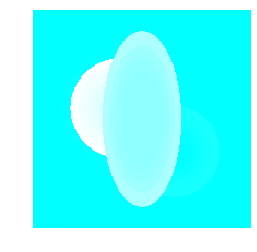

In [10]:
plt.imshow(mixed_hsv)
plt.axis("off")